In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
sns.set(style="whitegrid")
%matplotlib inline

os.makedirs("coffee_outputs", exist_ok=True)


In [3]:
df = pd.read_csv("C:\\Users\\Divya\\Downloads\\index (1).csv") 
df.columns = df.columns.str.strip() 
df.head(10)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [5]:
df['money'] = pd.to_numeric(df['money'], errors='coerce')
df['coffee_name'] = df['coffee_name'].astype(str).str.strip()
df['cash_type'] = df['cash_type'].astype(str).str.lower().str.strip()
df['card'] = df['card'].astype(str).str.strip()
df.info()
df['money'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1133 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


count    1133.000000
mean       33.105808
std         5.035366
min        18.120000
25%        28.900000
50%        32.820000
75%        37.720000
max        40.000000
Name: money, dtype: float64

In [18]:
def fix_time_string(t):
    
    s = str(t).strip()
   
    s = re.sub(r'[^\d:.]', '', s)
    parts = s.split(':')
    try:
        if len(parts) == 2:
            hh = int(parts[0]) if parts[0] else 0
          
            mm = int(float(parts[1]))
          
            add_hours = mm // 60
            mm = mm % 60
            hh = hh + add_hours
            hh = hh % 24
            return f"{hh:02d}:{mm:02d}:00"
        elif len(parts) == 3:
            hh = int(parts[0] or 0)
            mm = int(parts[1] or 0)
            ss = int(float(parts[2] or 0))
            add_hours = mm // 60
            mm = mm % 60
            hh = (hh + add_hours) % 24
            return f"{hh:02d}:{mm:02d}:{ss:02d}"
        else:
            return None
    except:
        return None


def make_timestamp(row):
    d = str(row['date']).strip()
    t_fixed = fix_time_string(row['datetime'])
    if not t_fixed:
      
        try:
            return pd.to_datetime(d, dayfirst=True, errors='coerce')
        except:
            return pd.NaT
    combined = f"{d} {t_fixed}"
    
    return pd.to_datetime(combined, dayfirst=True, errors='coerce')

df['timestamp'] = df.apply(make_timestamp, axis=1)

df[df['timestamp'].isna()]


C:\Users\Divya\AppData\Local\Temp\ipykernel_18836\2104800317.py:43: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(combined, dayfirst=True, errors='coerce')


,date,datetime,cash_type,card,money,coffee_name,timestamp


In [22]:
df['date_only'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

df['ts'] = df['timestamp'].fillna(df['date_only'])

df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.day_name()

def time_slot(h):
    if pd.isna(h): return 'unknown'
    h = int(h)
    if 5 <= h < 12: return 'morning'
    if 12 <= h < 17: return 'afternoon'
    if 17 <= h < 21: return 'evening'
    return 'night'

df['time_slot'] = df['hour'].apply(time_slot)
df[['date_only','ts','hour','time_slot','weekday']].head(8)


,date_only,ts,hour,time_slot,weekday
0,2024-01-03,2024-01-03 22:15:50,22,night,Wednesday
1,2024-01-03,2024-01-03 00:19:22,0,night,Wednesday
2,2024-01-03,2024-01-03 00:20:18,0,night,Wednesday
3,2024-01-03,2024-01-03 01:46:33,1,night,Wednesday
4,2024-01-03,2024-01-03 01:48:14,1,night,Wednesday
5,2024-01-03,2024-01-03 03:39:47,3,night,Wednesday
6,2024-01-03,2024-01-03 04:19:02,4,night,Wednesday
7,2024-01-03,2024-01-03 06:39:03,6,morning,Wednesday


In [26]:
total_revenue = df['money'].sum(skipna=True)
num_transactions = df.shape[0]
avg_sale = df['money'].mean()

print(f"Total revenue: {total_revenue:.2f}")
print(f"Number of transactions: {num_transactions}")
print(f"Average sale: {avg_sale:.2f}")

coffee_summary = df.groupby('coffee_name').agg(
    count=('coffee_name','count'),
    total_revenue=('money','sum'),
    avg_price=('money','mean')
).sort_values('count', ascending=False).reset_index()

coffee_summary


Total revenue: 37508.88
Number of transactions: 1133
Average sale: 33.11


,coffee_name,count,total_revenue,avg_price
0,Americano with Milk,268,8601.94,32.096791
1,Latte,243,9009.14,37.074650
2,Cappuccino,196,7333.14,37.413980
3,Americano,169,4644.54,27.482485
4,Cortado,99,2745.08,27.728081
5,Hot Chocolate,74,2778.48,37.547027
6,Espresso,49,1100.62,22.461633
7,Cocoa,35,1295.94,37.026857


In [29]:
pay_summary = df.groupby('cash_type').agg(
    transactions=('cash_type','count'),
    revenue=('money','sum')
).reset_index()
pay_summary


,cash_type,transactions,revenue
0,card,1044,34322.88
1,cash,89,3186.00


In [32]:
slot_summary = df.groupby('time_slot').agg(
    transactions=('money','count'),
    revenue=('money','sum'),
    avg_price=('money','mean')
).reindex(['morning','afternoon','evening','night','unknown']).fillna(0)
slot_summary


,transactions,revenue,avg_price
time_slot,,,
morning,333.0,10936.24,32.841562
afternoon,219.0,7308.12,33.370411
evening,213.0,7053.92,33.116995
night,368.0,12210.60,33.180978
unknown,0.0,0.00,0.000000


In [34]:
daily = df.groupby(df['date_only'].dt.date).agg(
    transactions=('money','count'),
    revenue=('money','sum')
).reset_index()
daily['date'] = pd.to_datetime(daily['date'])

plt.figure(figsize=(10,4))
plt.plot(daily['date'], daily['revenue'], marker='o')
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('coffee_outputs/daily_revenue.png', dpi=200)
plt.show()


KeyError: 'date'

In [36]:
print(df.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'timestamp', 'date_only', 'ts', 'hour', 'weekday', 'time_slot'],
      dtype='object')


In [38]:
df.columns = df.columns.str.strip()

In [40]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [44]:
daily = df.groupby(df['date']).agg(
    transactions=('money', 'count'),
    revenue=('money', 'sum')
).reset_index()


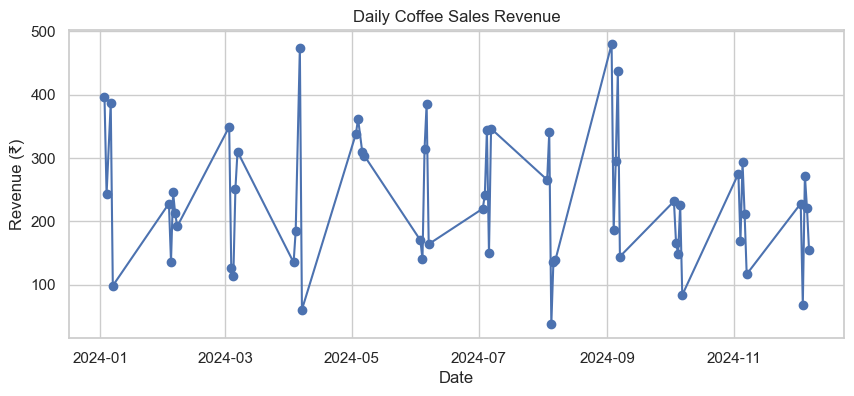

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(daily['date'], daily['revenue'], marker='o')
plt.title('Daily Coffee Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.show()


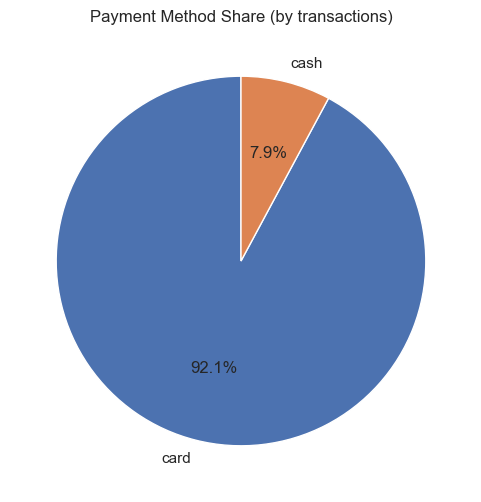

In [50]:
plt.figure(figsize=(6,6))
labels = pay_summary['cash_type']
sizes = pay_summary['transactions']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Share (by transactions)')
plt.savefig('coffee_outputs/payment_share.png', dpi=200)
plt.show()


In [53]:
coffee_summary.to_csv('coffee_outputs/coffee_summary.csv', index=False)
pay_summary.to_csv('coffee_outputs/payment_summary.csv', index=False)
daily.to_csv('coffee_outputs/daily_sales.csv', index=False)
print("Saved summaries and plots in folder: coffee_outputs")


Saved summaries and plots in folder: coffee_outputs


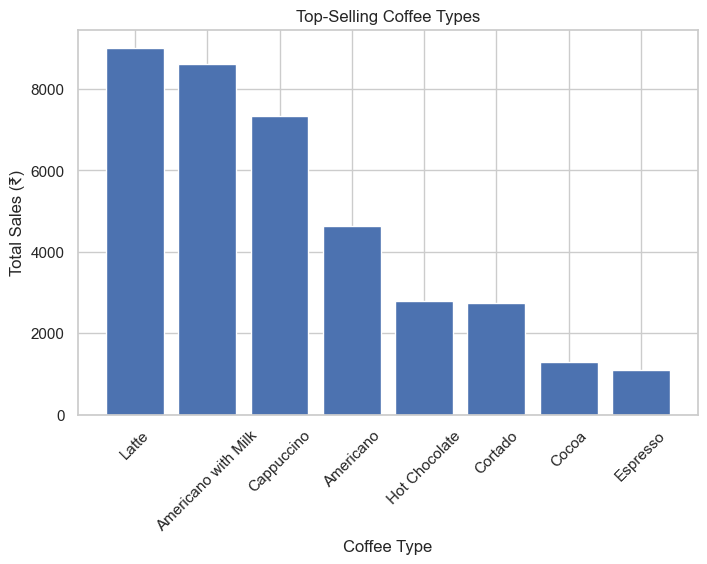

In [55]:
coffee_sales = df.groupby('coffee_name').agg(
    total_sales=('money', 'sum'),
    transactions=('money', 'count')
).reset_index().sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(coffee_sales['coffee_name'], coffee_sales['total_sales'])
plt.title('Top-Selling Coffee Types')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.show()
